## CLUSTERING ##

<i> In questo notebook spiego (o almeno cerco di spiegare) nel dettaglio cosa si intende con processo di clusterizzazione e come implementarlo a mano in modo da avere un maggior controllo sui vari step e un numero maggiore di gradi di libertà. Una parte è dedicata agli indici di performance con cui valutare, appunto, la performance dell'algoritmo. Prima di ogni sezione faccio una breve spiegazione del passaggio e linko la documentazione per approfondire e comprendere meglio in caso di necessità.

<b> INTRO AL CLUSTERING </b>

Quando abbiamo a che fare con i dati, spesso abbiamo alcuni punti nei nostri insiemi di dati e vogliamo usarli per fare una sorta di classificazione, previsione o anche regressione, questo si chiama apprendimento supervisionato. A volte, però, vogliamo classificare i dati in insiemi, senza conoscere l'etichetta (label) di ogni punto dei dati e in alcuni casi senza sapere quanti insiemi ci sono. Questo è l'apprendimento non supervisionato.

Il clustering è una delle forme di apprendimento non supervisionato più utilizzate. In questo notebook si spiegano le forme più comuni di clustering: <i> K-means e la forma gerarchica. </i>



<b> K-means Clustering Algorithm </b>

<i> Per ora utilizzo un dataset di punti fittizio, qui dovete interfacciarlo con la parte di preprocessing già svolta delle CER.</i>

Creo un dataset usando la funzione make_blobs presa dalla libreria sci-kit, creo 4 random cluster.

Ricordare sempre di importare per prima cosa le librerie e in caso vedere la documentazione per approfondirle, in questo caso:
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
- https://numpy.org/doc/
- https://matplotlib.org/stable/users/index.html

In [92]:
from sklearn.datasets import make_blobs 
import numpy as np 
import matplotlib.pyplot as plt 

Dopo aver importato le librerie creiamo il cluster e lo salviamo in <i> data </i>. Abbiamo 200 campionamenti/dati fittizi con 2 features ognuno. Per avere 4 cluster necessitiamo di 4 centri, impostiamo altresì la deviazione standard  del cluster e il random state che sarebbe un iperparametro (parametro del modello non dei dati) utilizzato per controllare la randomness del modello.
Per approfondimenti: https://towardsdatascience.com/why-do-we-set-a-random-state-in-machine-learning-models-bb2dc68d8431

In [93]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std = 0.8, random_state=6)

Trasformiamo il dataset in un numpy array.

- data[0] è il punto con le due features impostate sopra
- data[1] rappresenta il cluster di ogni campione del dataset

Con la funzione print visualizziamo la forma dei punti generati

In [94]:
points = data[0]   
print('The shape of the points is',np.shape(points))

The shape of the points is (200, 2)


Scatter plot

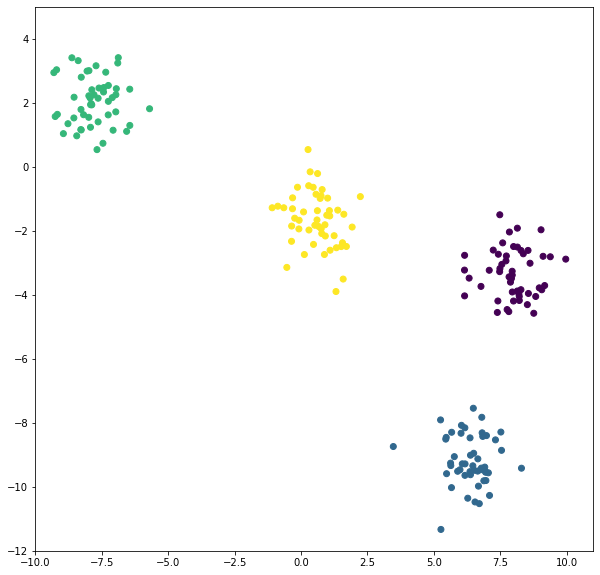

In [105]:
plt.scatter(points[:,0], points[:,1], c=data[1], cmap='viridis')
plt.xlim(-10,11)
plt.ylim(-12,5)
plt.rcParams["figure.figsize"] = (10,10)

Abbiamo i nostri 4 cluster distinti con differenti colori.
Il primo passo del k-mean è selezionare in modo randomico i centroidi in numero pari al numero di cluster, quindi ora 4. Li selezioniamo non tra i dati ma da una distribuzione random.

<b> Inizializzazione dei centroidi </b>

Come detto viene fatta una inizializzazione random tramite un random generator: https://numpy.org/doc/stable/reference/random/generator.html

La funzione selecting_centroids prende in input un dataset, il numero di cluster da creare e un random seed (inizializzatore di numeri casuali, cambiandone il valore ho differenti inizializzazioni) e restituisce i centroidi generati randomicamente.

In centroids utilizziamo la funzione per selezionare i 4 centroidi voluti che verranno plottate come delle X rosse.


the shape of the centroids is: (4, 2)


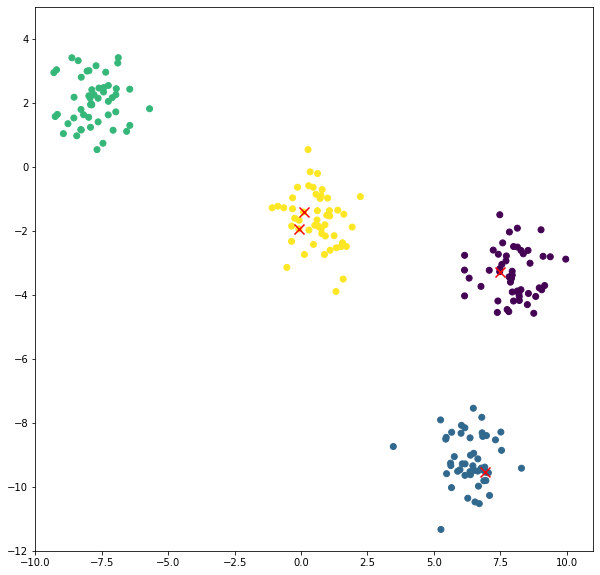

In [106]:
from numpy.random import default_rng 


def selecting_centroids(points, n_clusters, rseed = 50):
  rng = default_rng(rseed)
  centers_index = rng.permutation(points.shape[0])[:n_clusters]
  centers = points[centers_index]
  return centers

centroids = selecting_centroids(points,4)
print('the shape of the centroids is:', np.shape(centroids)) 
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.scatter(centroids.T[0], centroids.T[1], c='red', marker = 'x', s = 100, alpha = 1)  
plt.xlim(-10,11)
plt.ylim(-12,5)
plt.rcParams["figure.figsize"] = (10,10)

<b> Implementazione del K Means </b>

Dati i 4 centroidi facciamo un loop diviso in tre fasi:

- assegnare ogni campione al centro più vicino
- trovare un nuovo centro dalla media dei punti
- iterare a convergenza

per assegnare ogni campione al centro più vicino usiamo la funzione pairwise_distance_argmin nativa di sklear che calcola la distanza euclidea tra i punti.
Link utili:
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html
- https://docs.python.org/3/library/time.html

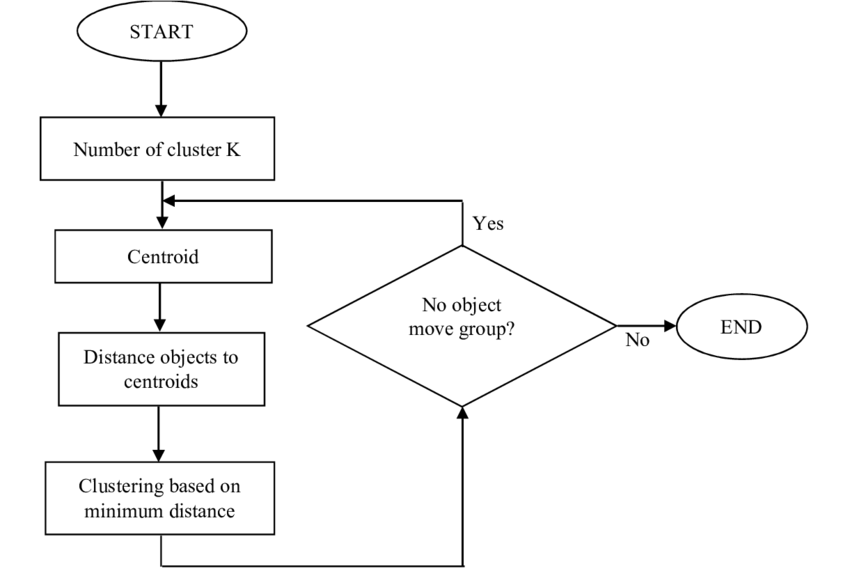


Con find_cluster si implementa manualmente l'algoritmo k-means. Si nota già vedendo nei dati di input come è necessario conoscere il numero di cluster che vogliamo ottenere alla fine della procedura. Gli altri due input sono il dataset e il già visto random seed con valore impostato a 50.

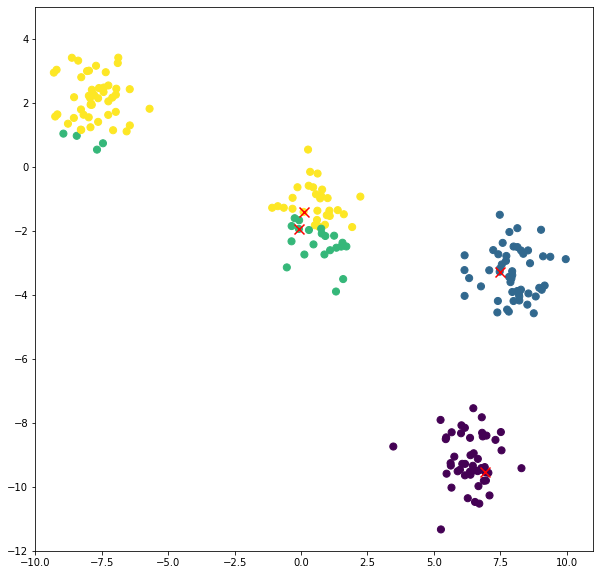

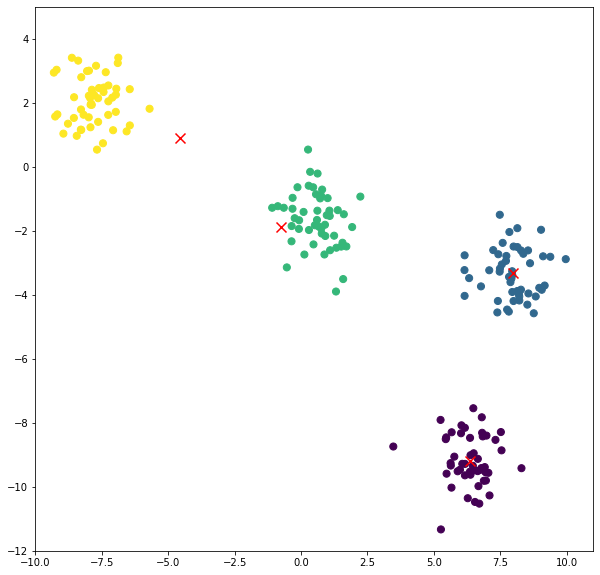

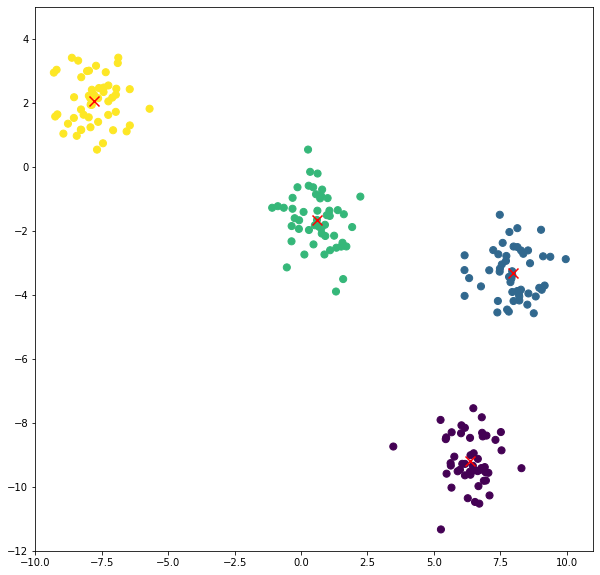

(-12.0, 5.0)

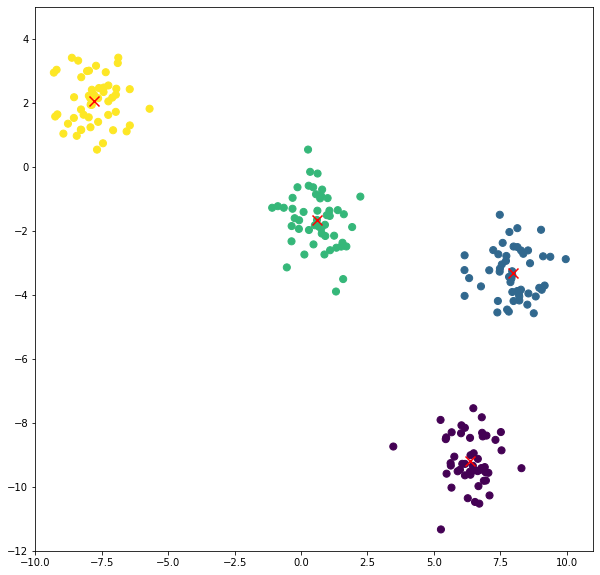

In [109]:
from sklearn.metrics import pairwise_distances_argmin 
import time 

def find_clusters(points, n_clusters, rseed =50):
  
  #1 INIZIALIZZAZIONE RANDOM DEI CENTROIDI utilizzando la funzione precedente
  centers = selecting_centroids(points,n_clusters, rseed)

  while True: #impostiamo il loop fino a che si arriva a convergenza 
    plt.close()
    #2.1  ASSEGNARE OGNI DATA SAMPLE AD UN LABEL
    labels = pairwise_distances_argmin(points, centers) # questa funziona calcola per ogni elemento in points l'indice del centro più vicino
    #NB: solitamente se non specificato si usa la distanza euclidea.

    #2.2 TROVARE NUOVI CENTRI 
    new_centers = np.array([points[labels == i].mean(0)
                                for i in range(n_clusters)]) #il nuovo valore dei centroidi è dato dalla media dei punti del nuovo cluster
    
    # plotto il loop per vedere come cambia la posizione dei centroidi
    plt.scatter(points[:, 0], points[:, 1], c=labels, s=50, cmap='viridis');
    plt.scatter(centers.T[0], centers.T[1], c='red', marker = 'x', s = 100, alpha = 1)
    plt.xlim(-10,11)
    plt.ylim(-12,5)
    plt.show()
    time.sleep(1) # il codice aspetta 1 secondo tra un plot e un altro per meglio vedere il cambiamento
    
    # 2.3 CONTROLLO DELLA CONVERGENZA
    if np.all(centers == new_centers): #se dopo una iterazione i centroidi non cambiano l'algoritmo si ferma, è arrivato a convergenza.
        break                          #se abbiamo raggiunto la convergenza stoppiamo il processo
    centers = new_centers
    
  return centers, labels

centers, labels = find_clusters(points,4)

plt.scatter(points[:, 0], points[:, 1], c=labels, s=50, cmap='viridis');
plt.scatter(centers.T[0], centers.T[1], c='red', marker = 'x', s = 100, alpha = 1)
plt.xlim(-10,11)
plt.ylim(-12,5)


Vediamo cosa succede cambiando l'initialization seed usando adesso il valore 2.

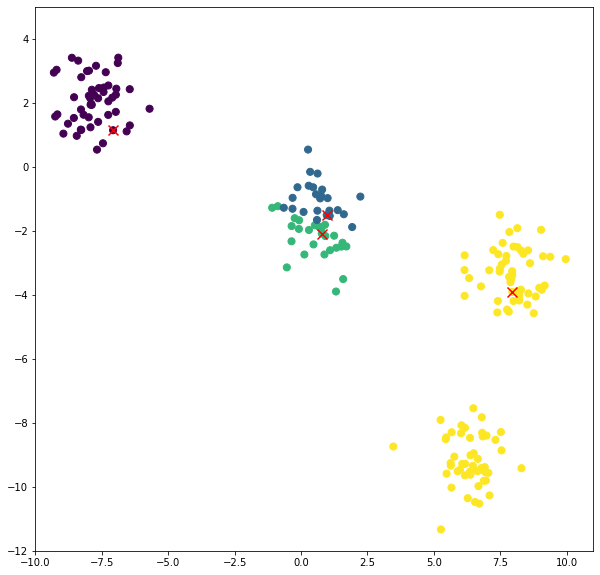

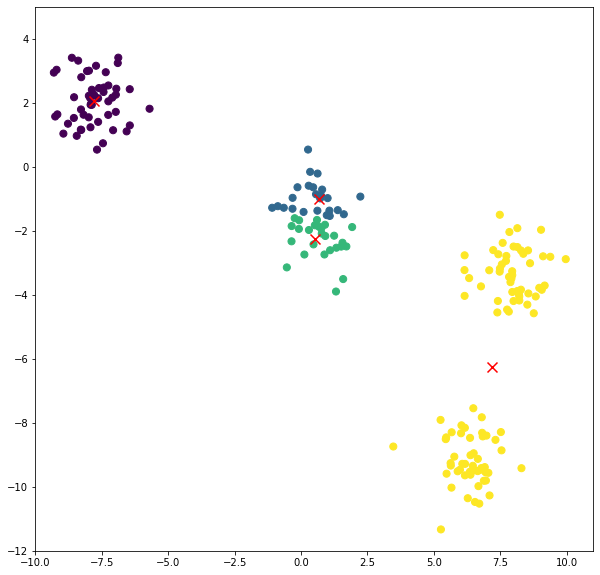

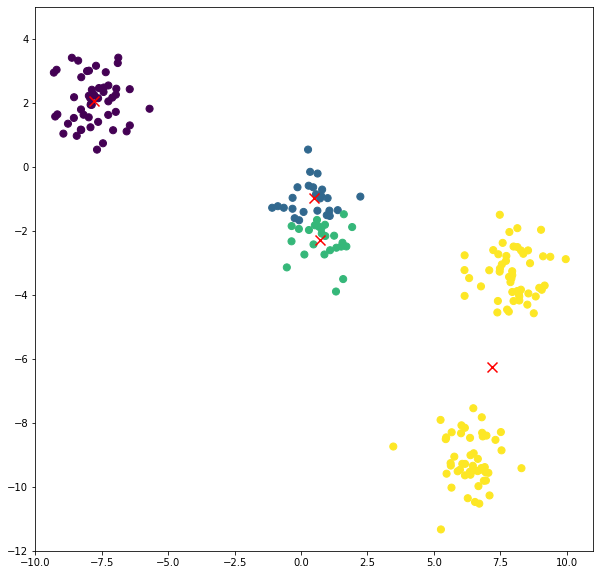

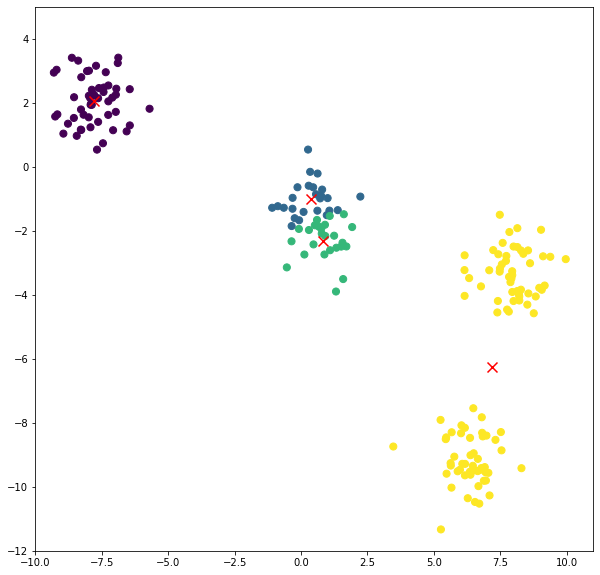

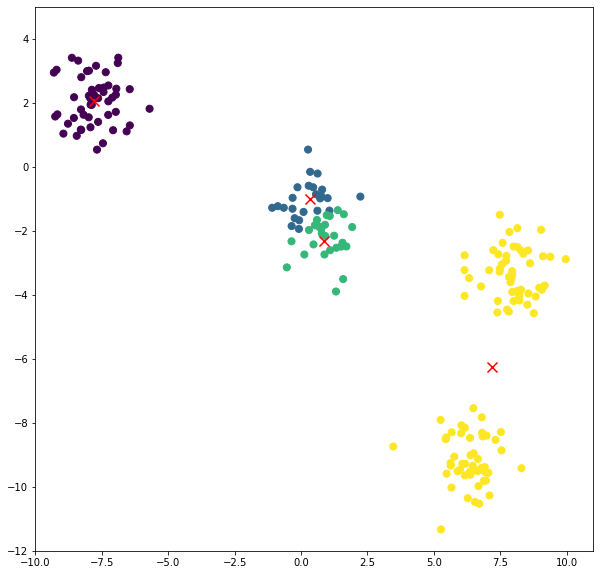

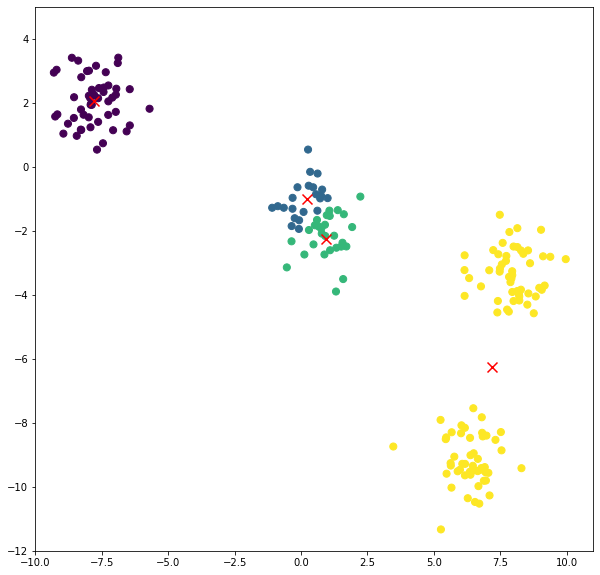

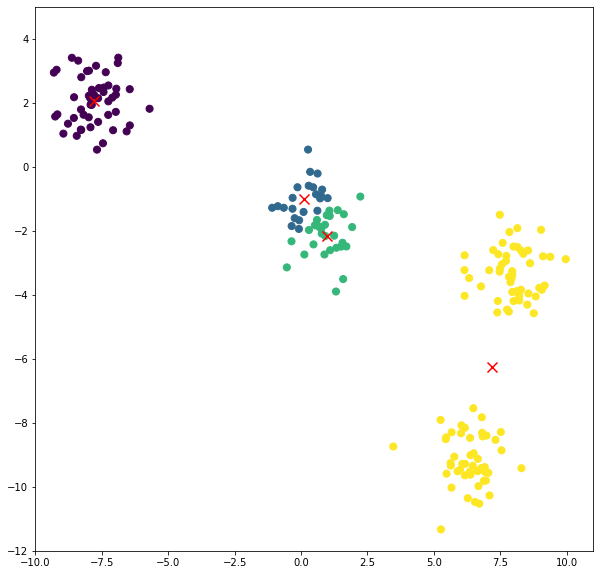

(-12.0, 5.0)

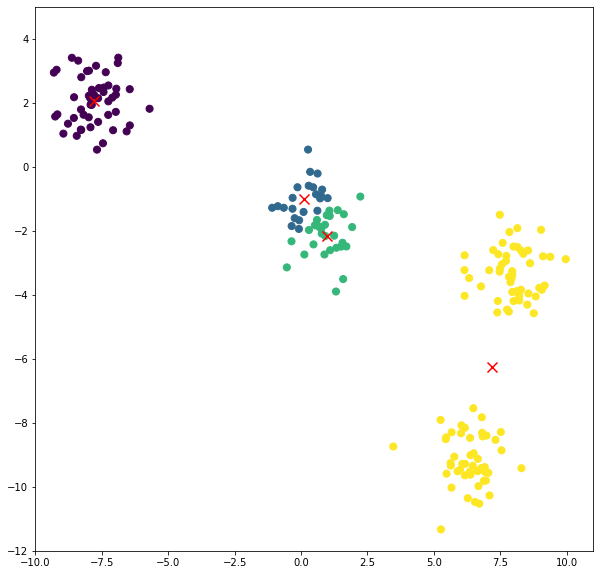

In [110]:
centers, labels = find_clusters(points,4,2) 

plt.scatter(points[:, 0], points[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers.T[0], centers.T[1], c='red', marker = 'x', s = 100, alpha = 1)
plt.xlim(-10,11)
plt.ylim(-12,5)


Come si vede la selezione randomica dei centroidi può creare problemi andando ad influire sulla veriditicità della clusterizzazione.

Per questo motivo adesso si implementa il <b> K-means++ algorithm </b> il quale è già presente di default in Python e lavora con una migliore initialization seeding per trovare i migliori cluster. Questo è fatto automaticamente in Pyhton quando si richiamo il KMeans da sklearn. Questo algoritmo seleziona non tutti i centroidi insieme, inizia da un punto random e dopo seleziona gli altri in modo che la distanza tra i nuovi centroidi e quelli già esistenti sia grande. In questo modo c'è un rischio inferiore di bloccarsi in un minimo locale.

Link utili: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [113]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=4)
# fitting dei punti, questa funzione effettivamente fa il clustering  
kmeans.fit(points)
# salva la locazione dei centri 
centers = (kmeans.cluster_centers_) #è una funzione che ritorna in modo automatico i centroidi dopo il clustering
# salva nuovi label
y_km = kmeans.fit_predict(points) #predict  è la funzione per assegnare i nuovi label ai dati

(-12.0, 5.0)

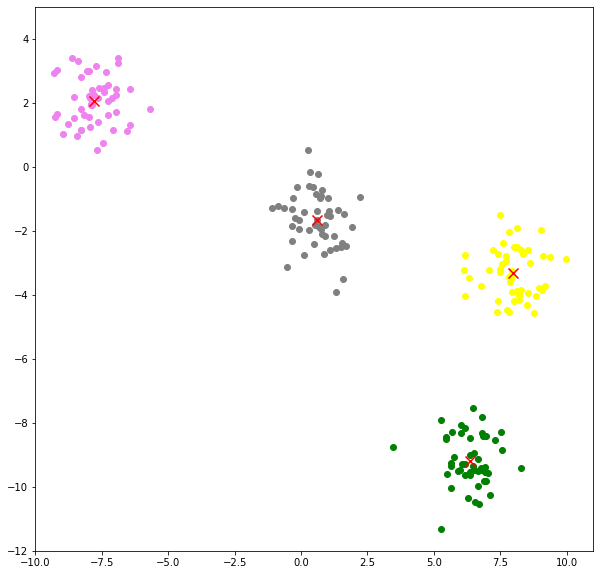

In [114]:
#plot dei dati
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], c='violet')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], c='green')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], c='yellow')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], c='grey')
plt.scatter(centers.T[0], centers.T[1], c='red', marker = 'x', s = 100, alpha = 1)
plt.xlim(-10,11)
plt.ylim(-12,5)

<b> Criticità del K-Means </b>

- Si è gia visto come la random initialization possa portare ad errori nel clustering
- uno dei problemi più importanti senza ombra di dubbio è che nel caso reale non conosciamo il valore ottimo di <i> K </i>, dobbiamo 'indovinare' il numero di cluster nei dati, e questo può essere non banale, in particolare quando si lavora con dati più che 2D.

Vediamo gli effetti del cambiamento di <i> K </i>


(-15.0, 15.0)

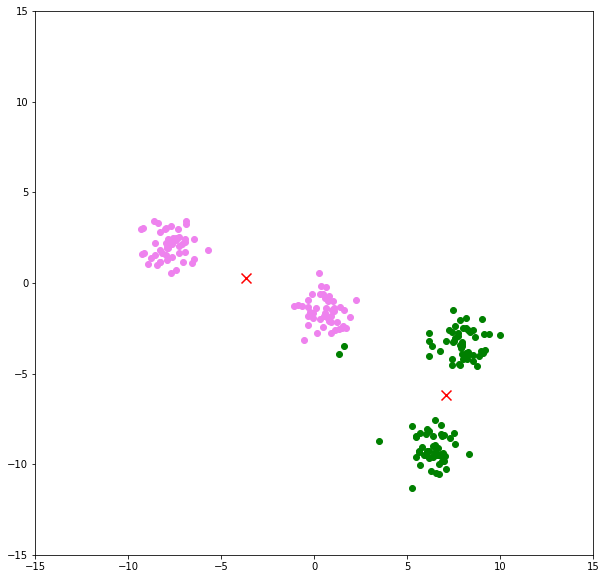

In [115]:
# K = 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(points)
centers = (kmeans.cluster_centers_)
y_km = kmeans.fit_predict(points)
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], c='violet')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], c='green')
plt.scatter(centers.T[0], centers.T[1], c='red', marker = 'x', s = 100, alpha = 1)
plt.xlim(-15,15)
plt.ylim(-15,15)

(-15.0, 15.0)

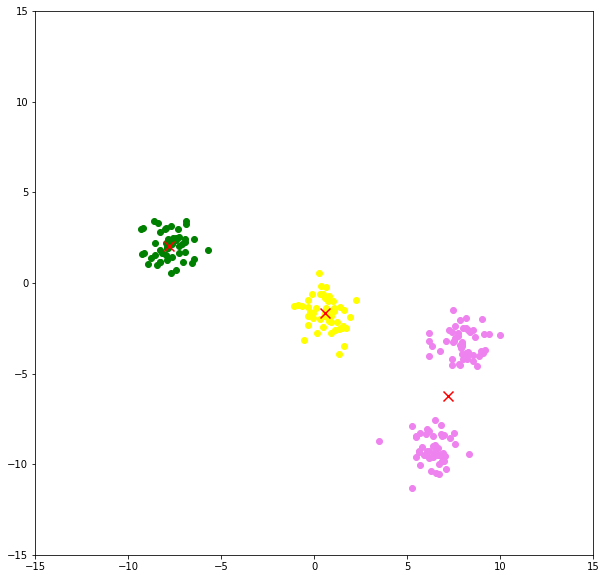

In [116]:
# K = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(points)
centers = (kmeans.cluster_centers_)
y_km = kmeans.fit_predict(points)
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], c='violet')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], c='green')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], c='yellow')
plt.scatter(centers.T[0], centers.T[1], c='red', marker = 'x', s = 100, alpha = 1)
plt.xlim(-15,15)
plt.ylim(-15,15)

(-15.0, 15.0)

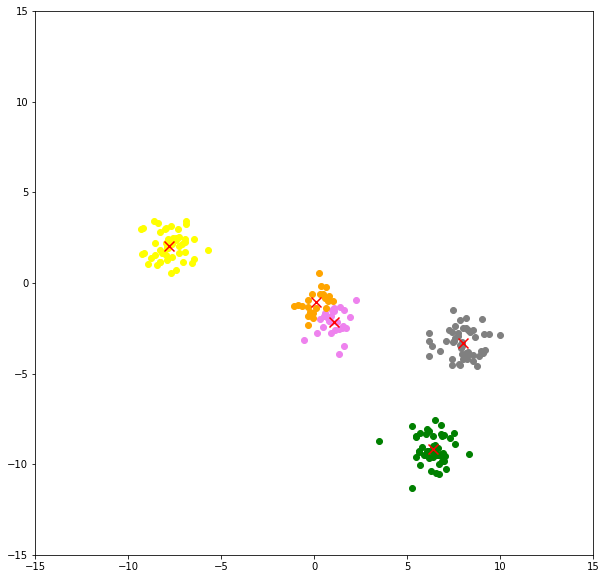

In [117]:
# K = 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
centers = (kmeans.cluster_centers_)
y_km = kmeans.fit_predict(points)
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], c='violet')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], c='green')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], c='yellow')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], c='grey')
plt.scatter(points[y_km ==4,0], points[y_km == 4,1], c='orange')
plt.scatter(centers.T[0], centers.T[1], c='red', marker = 'x', s = 100, alpha = 1)
plt.xlim(-15,15)
plt.ylim(-15,15)

In questo caso, osservando i dati siamo in grado di dire che, probabilmente, il valore ottimale di 𝐾 è 4, ma ancora una volta, quando si lavora con campioni più che bidimensionali non è possibile visualizzare graficamente i dati. Per questo motivo, avremo bisogno di alcuni indici per valutare le prestazioni della soluzione proposta, che vedremo nel seguito.

Un altro problema può essere dato da una quantità crescente di rumore nel dataset, infatti, i campioni appartenenti allo stesso cluster tenderebbero a essere più radi; inoltre, se il rumore nei dati è abbastanza presente, trovare il giusto 𝐾 è ancora più difficile e questo aspetto è sottolineato dal codice seguente in cui si può vedere come i cluster tendono a diventare più radi all'aumentare della deviazione standard nei cluster.

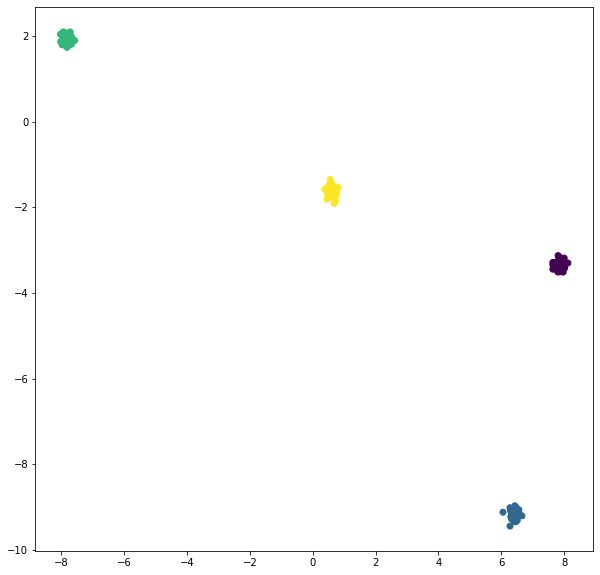

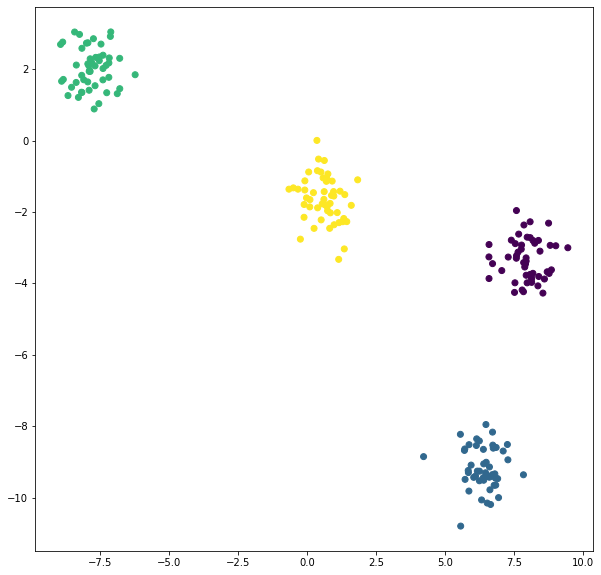

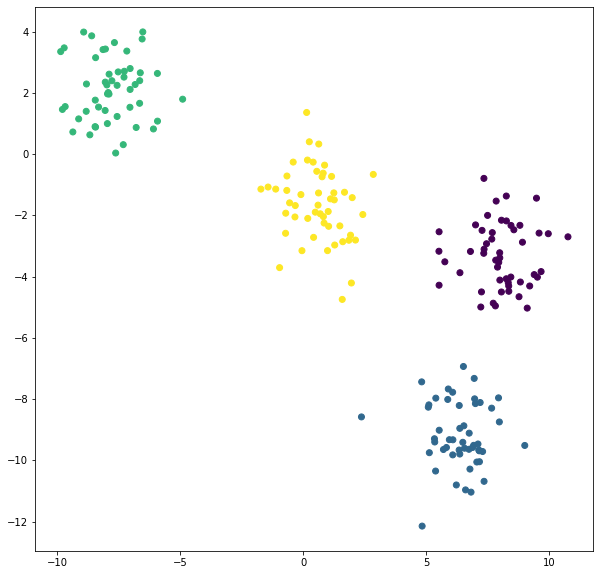

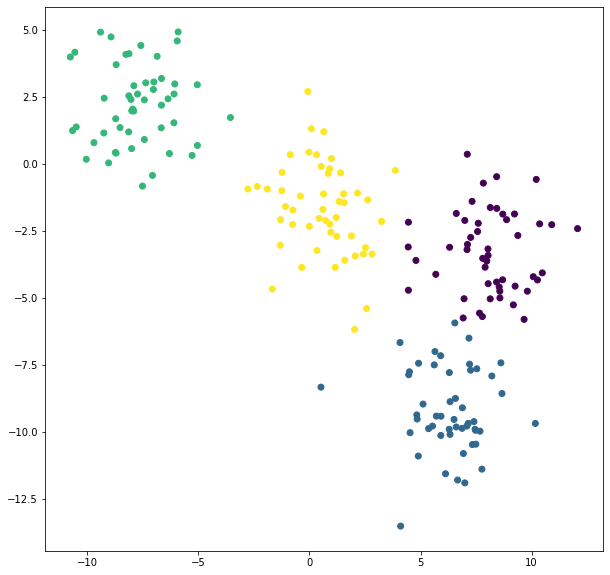

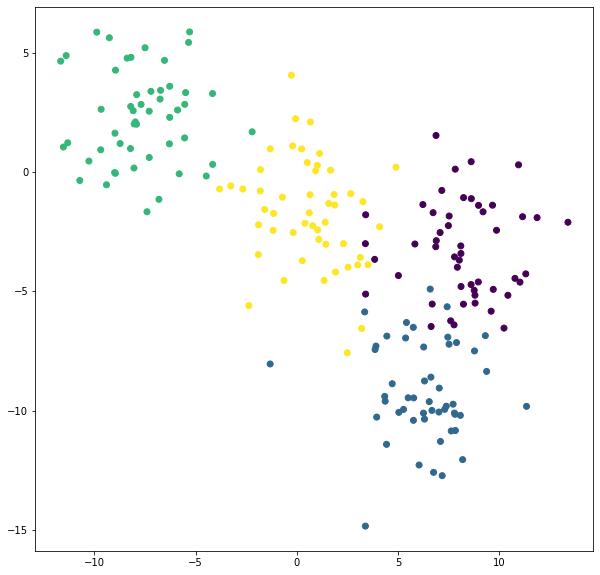

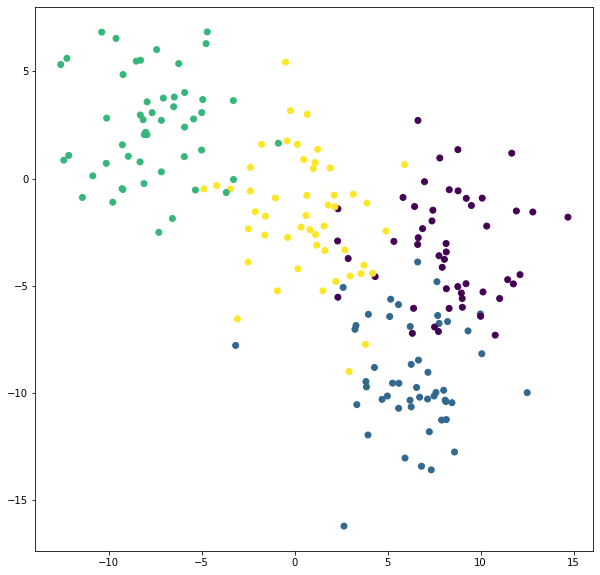

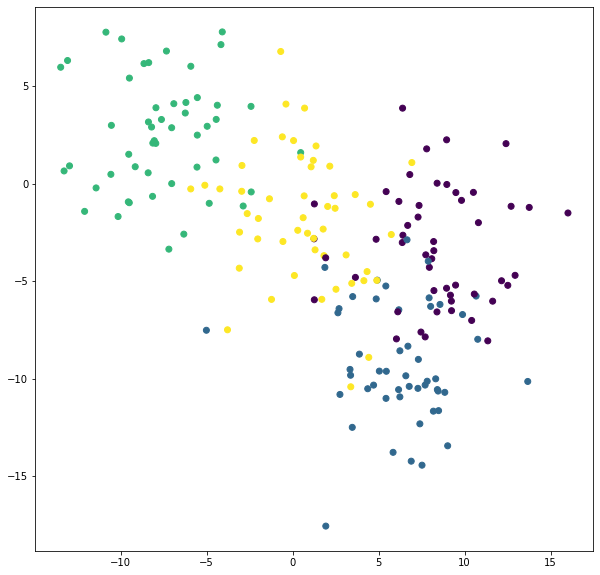

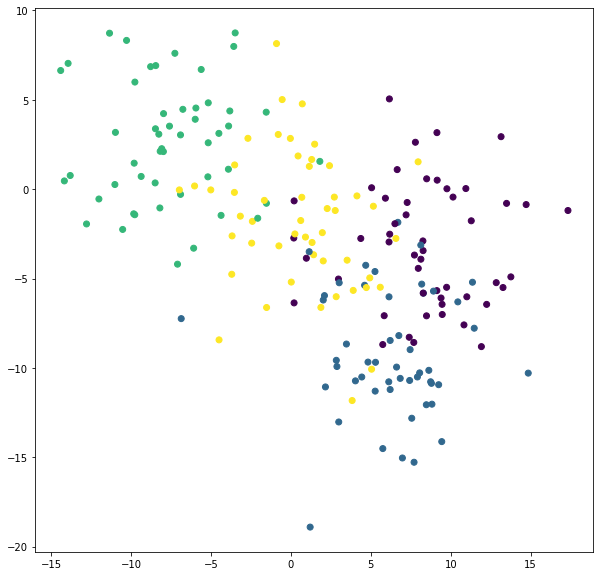

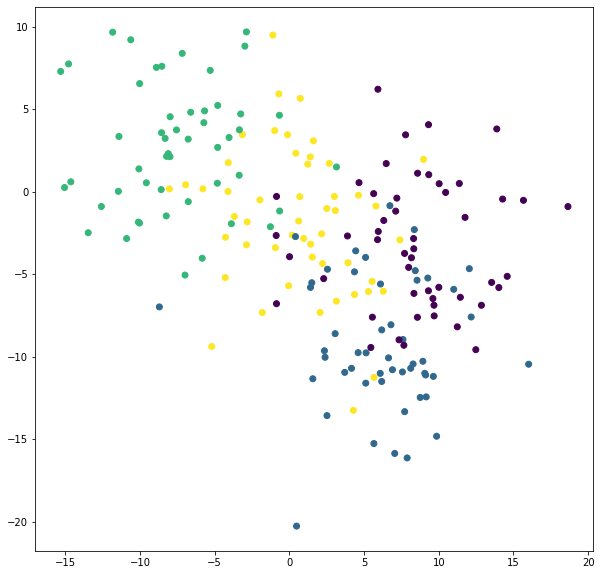

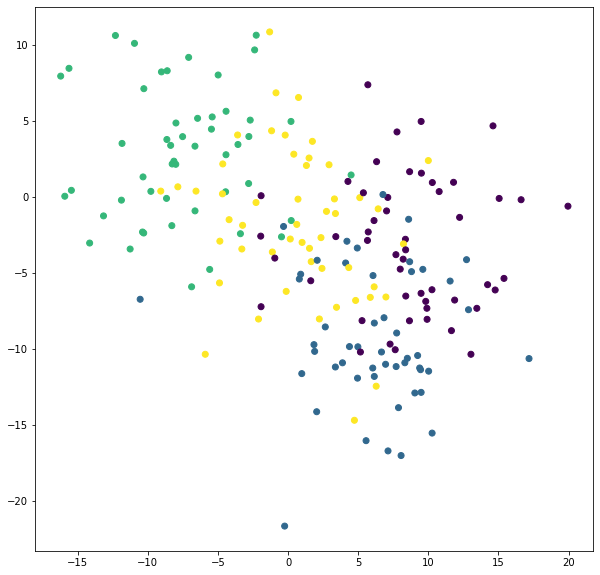

In [120]:
import time 

def data_creation_and_plotting(noise):
  '''with this function we can crate each time the same dataset with different level of noise'''
  data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std = noise*0.1, random_state=6)
  points = data[0]
  plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
  plt.show()
  return points


for i in range(1,51,5):
  data_creation_and_plotting(i)
  time.sleep(1) 
  plt.close() #se non chiudiamo il plot continua ad andare in overlap

Si può notare che ogni volta che il rumore aumenta, e in questo caso il rumore è dato dalla deviazione standard, è più difficile trovare il numero ottimale di 𝐾 ed è anche più difficile trovare effettivamente i cluster reali.

## CLUSTERING PROCEDURE EVALUATION ##

Se dobbiamo affrontare tutti questi problemi, e non possiamo scrivere una vera e propria funzione di perdita perché non conosciamo l'etichetta di ogni campione, come possiamo valutare la bontà del risultato di un algoritmo di clustering?

Per rispondere a questa domanda dobbiamo partire dalle proprietà dei cluster: ogni cluster, infatti, deve essere per definizione compatto e separato dagli altri cluster:
- massima distanza intercluster
- minima distanza intercluster

Dobbiamo definire un indice che rappresenti queste proprietà, da utilizzare per scegliere la migliore tra le diverse soluzioni.

<b> INDICE DI DAVIES-BOULDIN </b>

L'indice Davies-Bouldin è una delle misure di valutazione degli algoritmi di clustering. È più comunemente usato per valutare la bontà della suddivisione di un algoritmo di clustering K-means. In pratica, viene calcolato come la somiglianza media di ogni cluster con il cluster più simile ad esso. Migliore è la separazione dei cluster e migliore è il risultato della prestazione di clustering eseguita.

Questo punteggio è definito come la misura di somiglianza media di ogni cluster con il suo cluster più simile, dove la somiglianza è il rapporto tra le distanze all'interno del cluster e le distanze tra i cluster. Pertanto, i cluster più distanti e meno dispersi otterranno un punteggio migliore. Il punteggio minimo è pari a zero, mentre i valori più bassi indicano una procedura di clustering migliore.

La formula di questo indice è riportata di seguito:
<p align = 'center'> $DB = \frac{1}{n_c}\sum_{i=1}^{n_c}R_i$

dove:
- $n_c$ è il numero dei cluster
- $c_i$ è il cluster i
- $v_i$ è il centroide del cluster $c_i$
- $R_i = max_{j=1...n_c,i≠j}(R_{ij}), i =1,...,n_c$
- $R_{ij} = \frac{s_i + s_j}{d_{ij}}$
- $d_{ij}$ è la distanza Euclidea tra i centroidi del cluster $C_i$ e $C_j$
- $s_i = \frac{1}{||Ci||}\sum_{x \in C_i}d(x,v_i)$
    
Questo indice può essere facilmente implementato in Python usando la libreria sklear con la funzione <b> sklearn.metrics.davies_bouldin_score(X, labels)</b>

Valutiamo il valore dell'indice al variare del numero di cluster nel primo dataset.
    
Link utile: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html

In [139]:
from sklearn.metrics import davies_bouldin_score 

# creazione del dataset
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std = 0.8, random_state=6)
points = data[0]   

#valutiamo il DB score al variare di K nell'algoritmo K-Means
def DB_score(K, points=points):
  kmeans = KMeans(n_clusters=K)
  kmeans.fit(points)
  centers = (kmeans.cluster_centers_)
  y_km = kmeans.fit_predict(points)
  DB = davies_bouldin_score(points, y_km)
  print(f' the Davies-Bouldin score with K = {K} is {DB}')
  return

for i in range(2,10):
  DB_score(i)

 the Davies-Bouldin score with K = 2 is 0.6216480283037619
 the Davies-Bouldin score with K = 3 is 0.4229378182927162
 the Davies-Bouldin score with K = 4 is 0.2762249158325895
 the Davies-Bouldin score with K = 5 is 0.5885834273625867
 the Davies-Bouldin score with K = 6 is 0.8169679876549196
 the Davies-Bouldin score with K = 7 is 0.9631456245137544
 the Davies-Bouldin score with K = 8 is 1.1135925438477072
 the Davies-Bouldin score with K = 9 is 1.0361601167747694


Come ci aspettavamo il valore ottimo di 𝐾 sembra essere 4.

Ora vediamo cosa succede al variare della deviazione standar di ogni cluster.

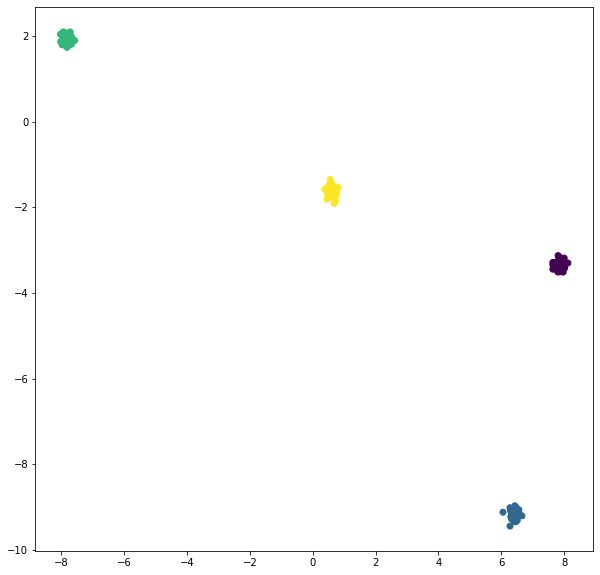

 the Davies-Bouldin score whit K = 2 is 0.6045203041664325
 the Davies-Bouldin score whit K = 3 is 0.3202407423674131
 the Davies-Bouldin score whit K = 4 is 0.03489006366079024
 the Davies-Bouldin score whit K = 5 is 0.4389435277725603
 the Davies-Bouldin score whit K = 6 is 0.7611445059717776
 the Davies-Bouldin score whit K = 7 is 0.955323151414485
 the Davies-Bouldin score whit K = 8 is 1.112500791534921
 the Davies-Bouldin score whit K = 9 is 1.094227185194262


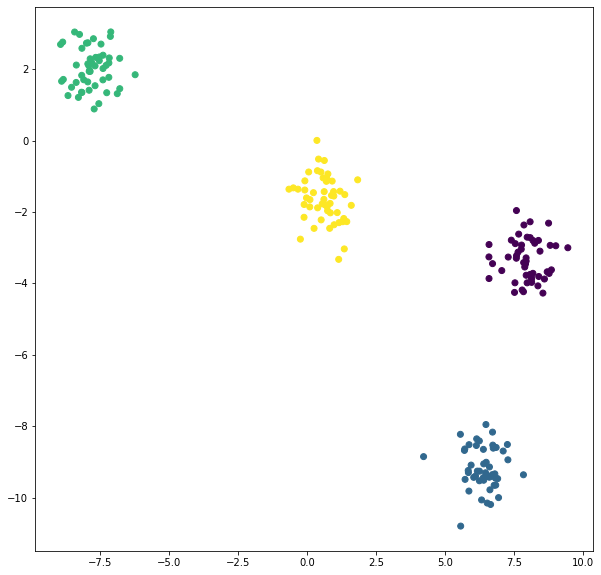

 the Davies-Bouldin score whit K = 2 is 0.6136566008528689
 the Davies-Bouldin score whit K = 3 is 0.39200964610673555
 the Davies-Bouldin score whit K = 4 is 0.20779116991971275
 the Davies-Bouldin score whit K = 5 is 0.5426727845463905
 the Davies-Bouldin score whit K = 6 is 0.7748496077735402
 the Davies-Bouldin score whit K = 7 is 0.953635273768367
 the Davies-Bouldin score whit K = 8 is 1.160094281673019
 the Davies-Bouldin score whit K = 9 is 1.0069560249342075


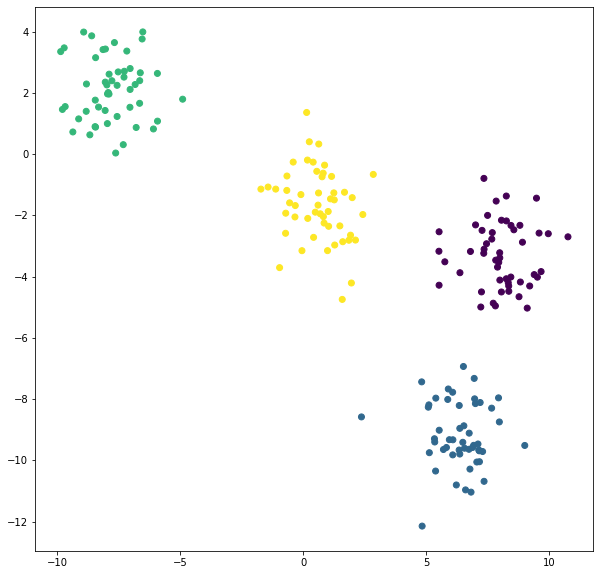

 the Davies-Bouldin score whit K = 2 is 0.6265943294646015
 the Davies-Bouldin score whit K = 3 is 0.4802551243466313
 the Davies-Bouldin score whit K = 4 is 0.37809260442217396
 the Davies-Bouldin score whit K = 5 is 0.6518753134812478
 the Davies-Bouldin score whit K = 6 is 0.8592189263091056
 the Davies-Bouldin score whit K = 7 is 0.9948347252021817
 the Davies-Bouldin score whit K = 8 is 1.0956939372142043
 the Davies-Bouldin score whit K = 9 is 0.9923449906356632


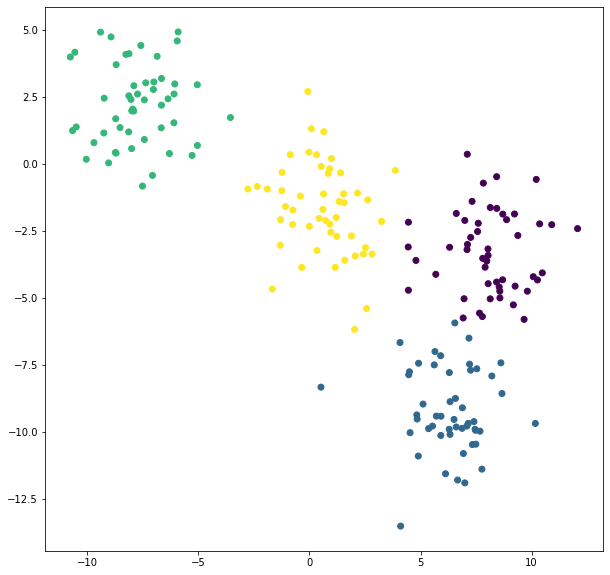

 the Davies-Bouldin score whit K = 2 is 0.5978332056861143
 the Davies-Bouldin score whit K = 3 is 0.6184808482234548
 the Davies-Bouldin score whit K = 4 is 0.5447530576166392
 the Davies-Bouldin score whit K = 5 is 0.7026023547366543
 the Davies-Bouldin score whit K = 6 is 0.7817020915904216
 the Davies-Bouldin score whit K = 7 is 1.0221090784868168
 the Davies-Bouldin score whit K = 8 is 0.9876950162007685
 the Davies-Bouldin score whit K = 9 is 0.9426795247136154


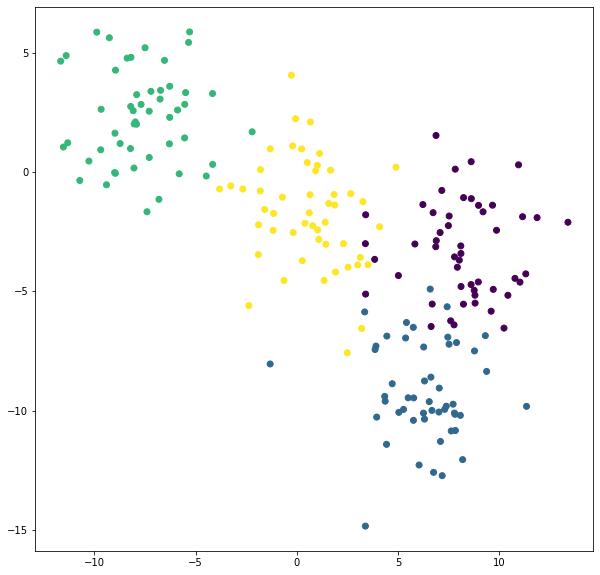

 the Davies-Bouldin score whit K = 2 is 0.6235054556864044
 the Davies-Bouldin score whit K = 3 is 0.7028917488369023
 the Davies-Bouldin score whit K = 4 is 0.6625241966321134
 the Davies-Bouldin score whit K = 5 is 0.7944798115410123
 the Davies-Bouldin score whit K = 6 is 0.8479204599205404
 the Davies-Bouldin score whit K = 7 is 0.9449990403778517
 the Davies-Bouldin score whit K = 8 is 0.9228411867999489
 the Davies-Bouldin score whit K = 9 is 0.8719590772441019


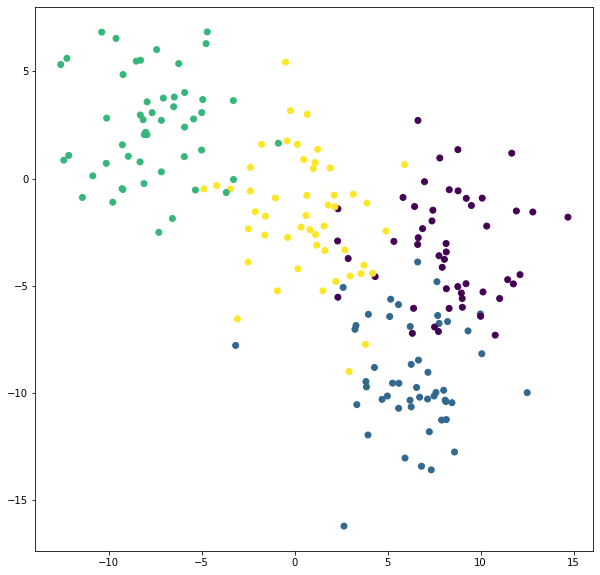

 the Davies-Bouldin score whit K = 2 is 0.6524978369358411
 the Davies-Bouldin score whit K = 3 is 0.8215946459953537
 the Davies-Bouldin score whit K = 4 is 0.7529116462149146
 the Davies-Bouldin score whit K = 5 is 0.8265192423151856
 the Davies-Bouldin score whit K = 6 is 0.8686409377036863
 the Davies-Bouldin score whit K = 7 is 0.9401093537678075
 the Davies-Bouldin score whit K = 8 is 0.9158999142156605
 the Davies-Bouldin score whit K = 9 is 0.8504309941276949


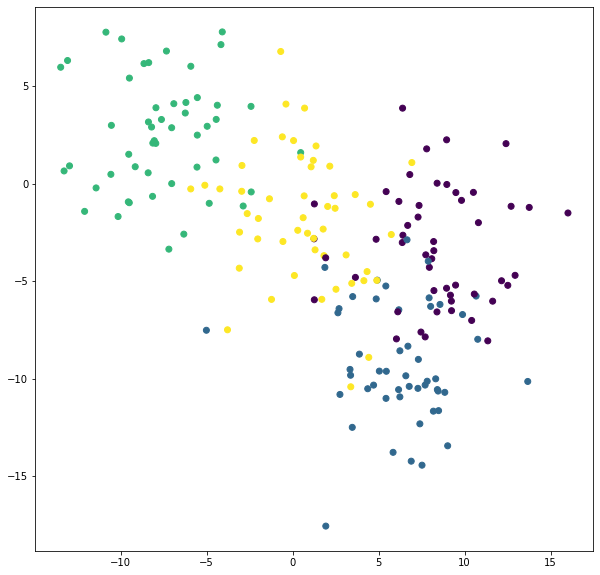

 the Davies-Bouldin score whit K = 2 is 0.6856593499778455
 the Davies-Bouldin score whit K = 3 is 0.9241925968160661
 the Davies-Bouldin score whit K = 4 is 0.7998884209704107
 the Davies-Bouldin score whit K = 5 is 0.8705866444325514
 the Davies-Bouldin score whit K = 6 is 0.8993793277058186
 the Davies-Bouldin score whit K = 7 is 0.9263111151396622
 the Davies-Bouldin score whit K = 8 is 0.8552433633296734
 the Davies-Bouldin score whit K = 9 is 0.8218382731388293


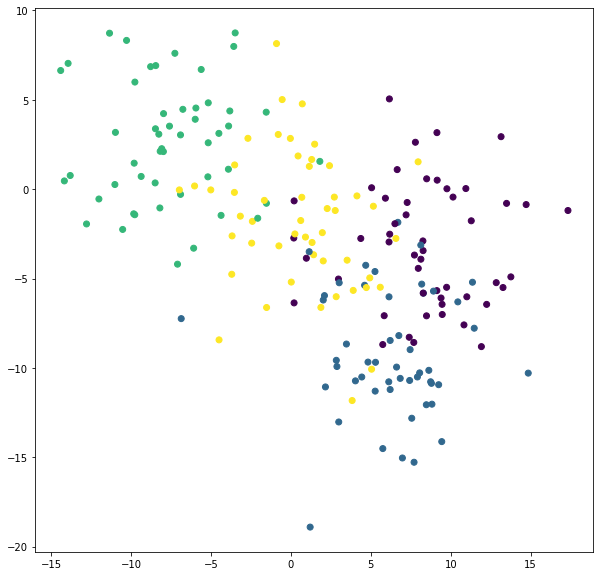

 the Davies-Bouldin score whit K = 2 is 0.7212556080185262
 the Davies-Bouldin score whit K = 3 is 0.9371945853900517
 the Davies-Bouldin score whit K = 4 is 0.8344680453131907
 the Davies-Bouldin score whit K = 5 is 0.8657283123410622
 the Davies-Bouldin score whit K = 6 is 0.9132416868464618
 the Davies-Bouldin score whit K = 7 is 0.886506059218456
 the Davies-Bouldin score whit K = 8 is 0.9074266150310121
 the Davies-Bouldin score whit K = 9 is 0.8607612417266792


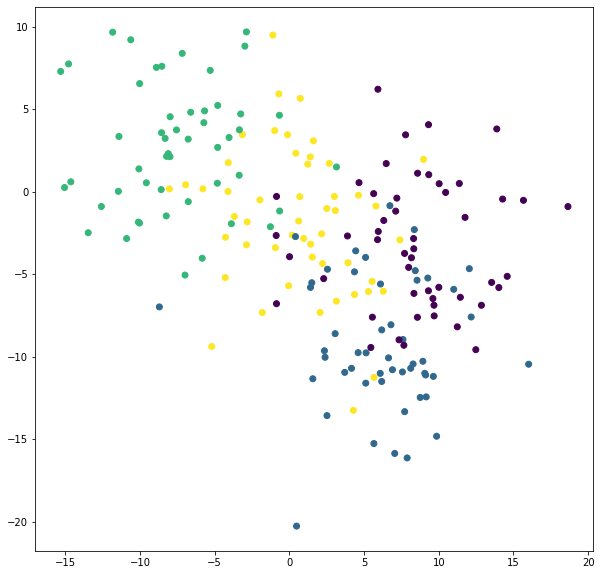

 the Davies-Bouldin score whit K = 2 is 0.7535512387810832
 the Davies-Bouldin score whit K = 3 is 0.9572848831791011
 the Davies-Bouldin score whit K = 4 is 0.9023288658759008
 the Davies-Bouldin score whit K = 5 is 0.8965421691081341
 the Davies-Bouldin score whit K = 6 is 0.9291904531813259
 the Davies-Bouldin score whit K = 7 is 0.899684413321481
 the Davies-Bouldin score whit K = 8 is 0.8974642993289026
 the Davies-Bouldin score whit K = 9 is 0.810442046073002


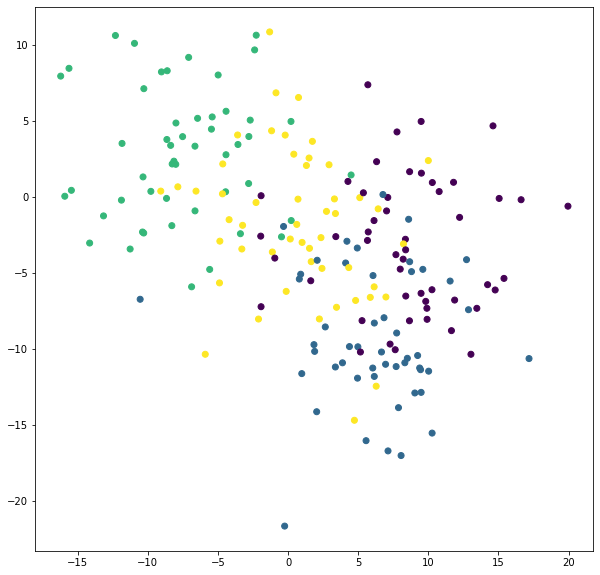

 the Davies-Bouldin score whit K = 2 is 0.7917866940164887
 the Davies-Bouldin score whit K = 3 is 0.9613866029529969
 the Davies-Bouldin score whit K = 4 is 0.9118095054900237
 the Davies-Bouldin score whit K = 5 is 0.9031849781526301
 the Davies-Bouldin score whit K = 6 is 0.905016173568678
 the Davies-Bouldin score whit K = 7 is 0.894412573529168
 the Davies-Bouldin score whit K = 8 is 0.8831826731837503
 the Davies-Bouldin score whit K = 9 is 0.8608170344568372


In [123]:
for noise in range(1,51,5):
  points = data_creation_and_plotting(noise)
  for k in range(2,10):
    DB_score(k, points)

Si può notare che quando si modifica la deviazione standard dei dati, l'uso dell'indice non è più utile per individuare il numero ottimale di cluster. Inoltre, quando si arriva all'ultimo esempio, sembra che il numero ottimale di cluster per questo set di dati sia uno, il che significa che tutti i punti di dati verrebbero raggruppati nello stesso insieme.

<b> INDICE SILHOUETTE

Un altro indice che possiamo prendere in considerazione per valutare le prestazioni del clustering è l'indice Silhouette.

Anche in questo caso dobbiamo assumere che i punti di dati siano stati raggruppati con una qualsiasi tecnica in 𝐾 cluster.

La prima cosa da fare è calcolare la distanza intra-cluster. Sia:
<p align = "center"> $a(i) = \frac{1}{|C_i|-1}\sum_{j \in C_i, i≠j}d(i,j)$
    
sia la media del punto $i$ e tutti i punti nello stesso cluster, dove $|C_i|$ è il numero dei punti appartenenti al cluster $C_i$.

In questo modo, possiamo interpretare $a(i)$ come la misura di quanto ben il punto è assegnato al suo cluster  (anche in questo caso più piccolo è il valore e migliore è l'assegnazione).

Dopo questo, definiamo la media della dissimilarità del punto $i$ al cluster $C_k$ come la media della distanza da $i$ a tutti i punti di $C_k$.

Per ogni dato in $C_i$ definiamo:
<p align = "center"> $b(i) = min_{k≠i} \frac{1}{|C_k|}\sum_{j \in C_k}d(i,j)$

come la più piccola distanza di $i$ a tutti i punti in ogni altro cluster. Il cluster con la più piccola dissimilarità media è detto *neighbor cluster* di $i$ perchè è il cluster che meglio si addice a quel punto.

Possiamo infine definire il **Silhouette index** del punto $i$ come:
<p align = "center"> $s(i) = \frac{b_i-a_i}{max\{a(i),b(i)\}}\sum_{j \in C_k}d(i,j)$; if $|C_i| > 1$

e

<p align = "center"> $s(i) = 0$; if $|C_i| = 1$

Il $s(i)$ vicino a $1$ significa che il dato è propriamente clusterizzato, se $s(i)$ è vicino a $-1$  vuol dire che il punto sarebbe più propriamente clusterizzato se fosse clusterizzato nel cluster vicino.
Quindi la media dei differenti $s(i)$ è una misura di quanto propriamente il dato è stato clusterizzato. Se ci sono troppi o troppo pochi cluster, qualcuno dei cluster mostrerà silhouette più strette del resto. 

Il termine **silhouette coefficient** è quindi introdotto come il valore massimo della media $s(i)$ su tutti i dati dell'intero dataset.
<p align = "center"> $SC = max_k \tilde{s}(k)$

dove $\tilde{s}(k)$ rappresenta la media $s(i)$sull'intero dataset per uno specifico numero di cluster $K$.

Anche in questo caso possiamo calcolare il Silhouette Coefficient medio su tutti i campioni con la funzione di sklearn **sklearn.metrics.silhouette_score()**.

In [125]:
from sklearn.metrics import silhouette_score
# creazione del dataset
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std = 0.8, random_state=6)
points = data[0] 

#calcoliamo il silhouette score al variare di k
def SC_score(K, points=points):
  kmeans = KMeans(n_clusters=K)
  kmeans.fit(points)
  centers = (kmeans.cluster_centers_)
  y_km = kmeans.fit_predict(points)
  SC = silhouette_score(points, y_km)
  print(' the Silhouette score whit K = ',K,'is', SC)
  return

for i in range(2,10):
  SC_score(i)

 the Silhouette score whit K =  2 is 0.6126351951396358
 the Silhouette score whit K =  3 is 0.6926059423294169
 the Silhouette score whit K =  4 is 0.8012410501941752
 the Silhouette score whit K =  5 is 0.6844849077169645
 the Silhouette score whit K =  6 is 0.5762333379255723
 the Silhouette score whit K =  7 is 0.4774453796069722
 the Silhouette score whit K =  8 is 0.3454418325933573
 the Silhouette score whit K =  9 is 0.35226833616353376


Si può notare che anche in questo caso, utilizzando un indice diverso, il valore ottimale di 𝐾 è 4 (un valore più vicino a 1 è il migliore).

## APPLICAZIONI

In [132]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler


Uso un dataset pre-esistente con load_dataset

In [133]:
seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]


In [134]:
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

Euclidean k-means
16.434 --> 9.437 --> 9.437 --> 


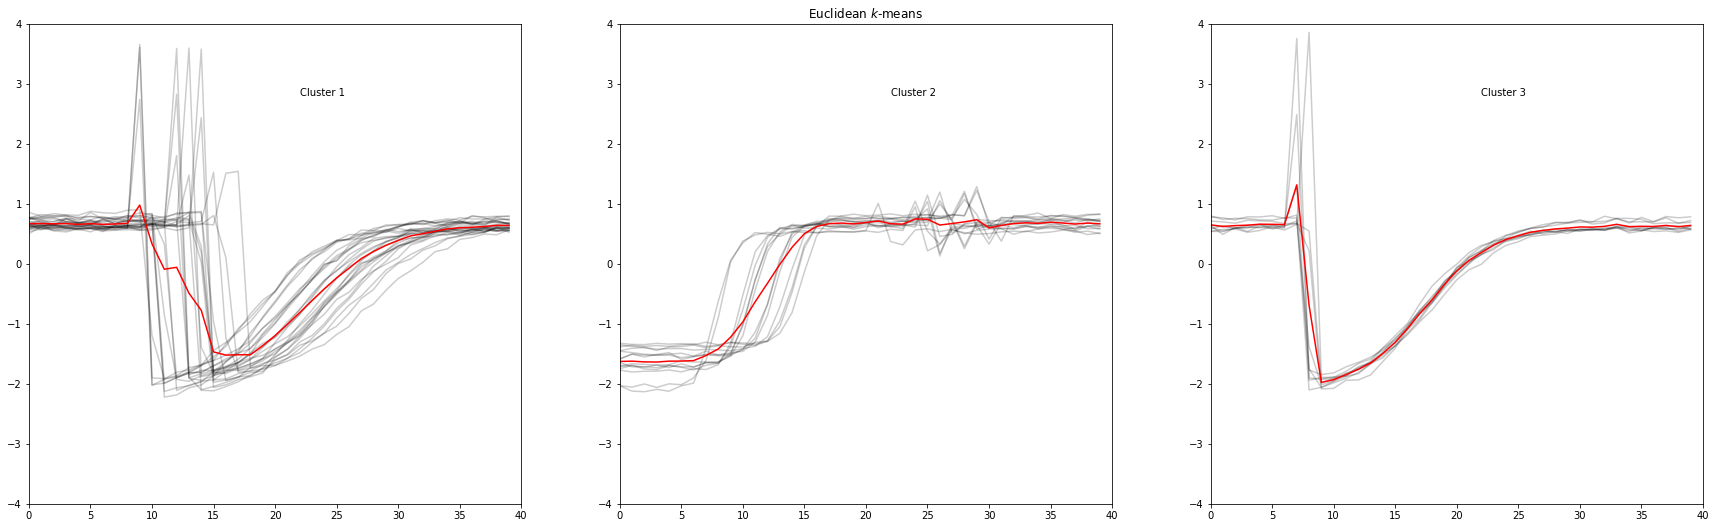

In [135]:
plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")
        plt.rcParams["figure.figsize"] = (30,30)

The **DTW Barycenter Averaging (DBA) algorithm** minimizes sum of squared DTW distance between the barycenter and the series in the cluster.

DBA k-means
Init 1
0.637 --> 0.458 --> 0.458 --> 
Init 2
0.826 --> 0.525 --> 0.477 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.472 --> 0.472 --> 


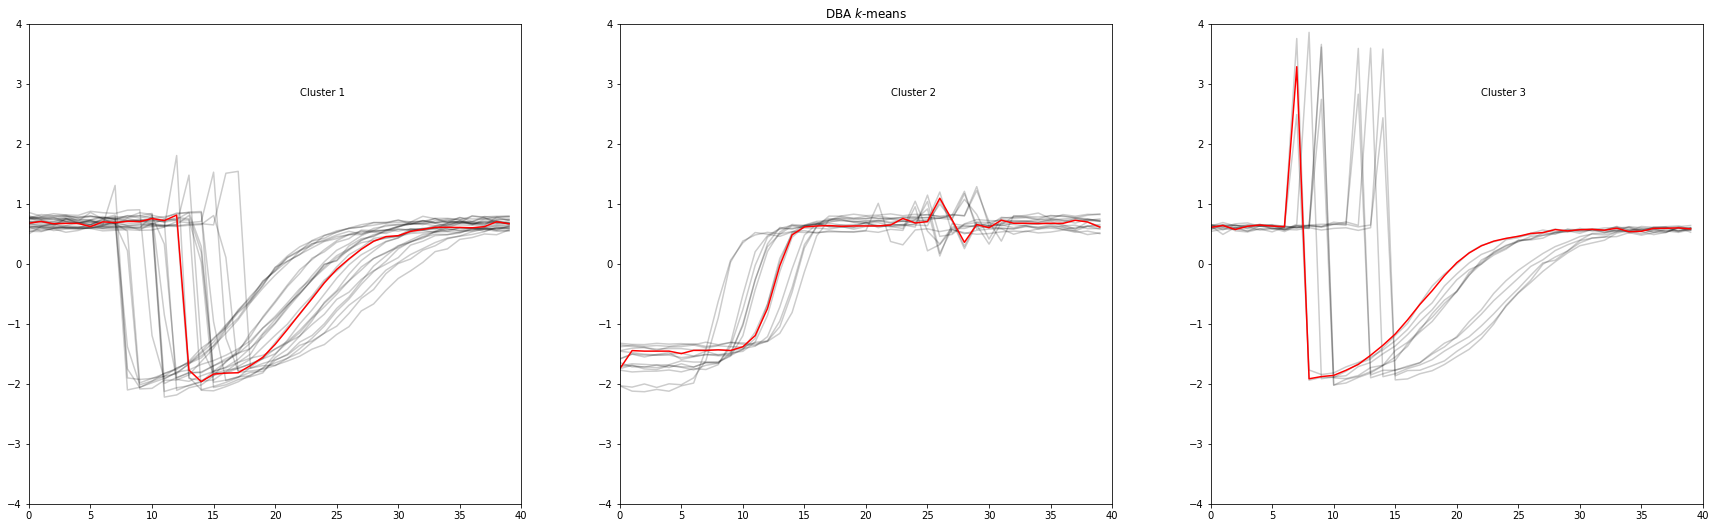

In [136]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    plt.rcParams["figure.figsize"] = (30,30)
    if yi == 1:
        plt.title("DBA $k$-means")
        

The **soft-DTW algorithm** minimizes the weighted sum of soft-DTW distances between the barycenter and the series in the cluster. The weights can be tuned but must sum to 1.


In [137]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

Soft-DTW k-means
0.472 --> 0.144 --> 0.142 --> 0.143 --> 0.142 --> 0.143 --> 0.142 --> 0.143 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 


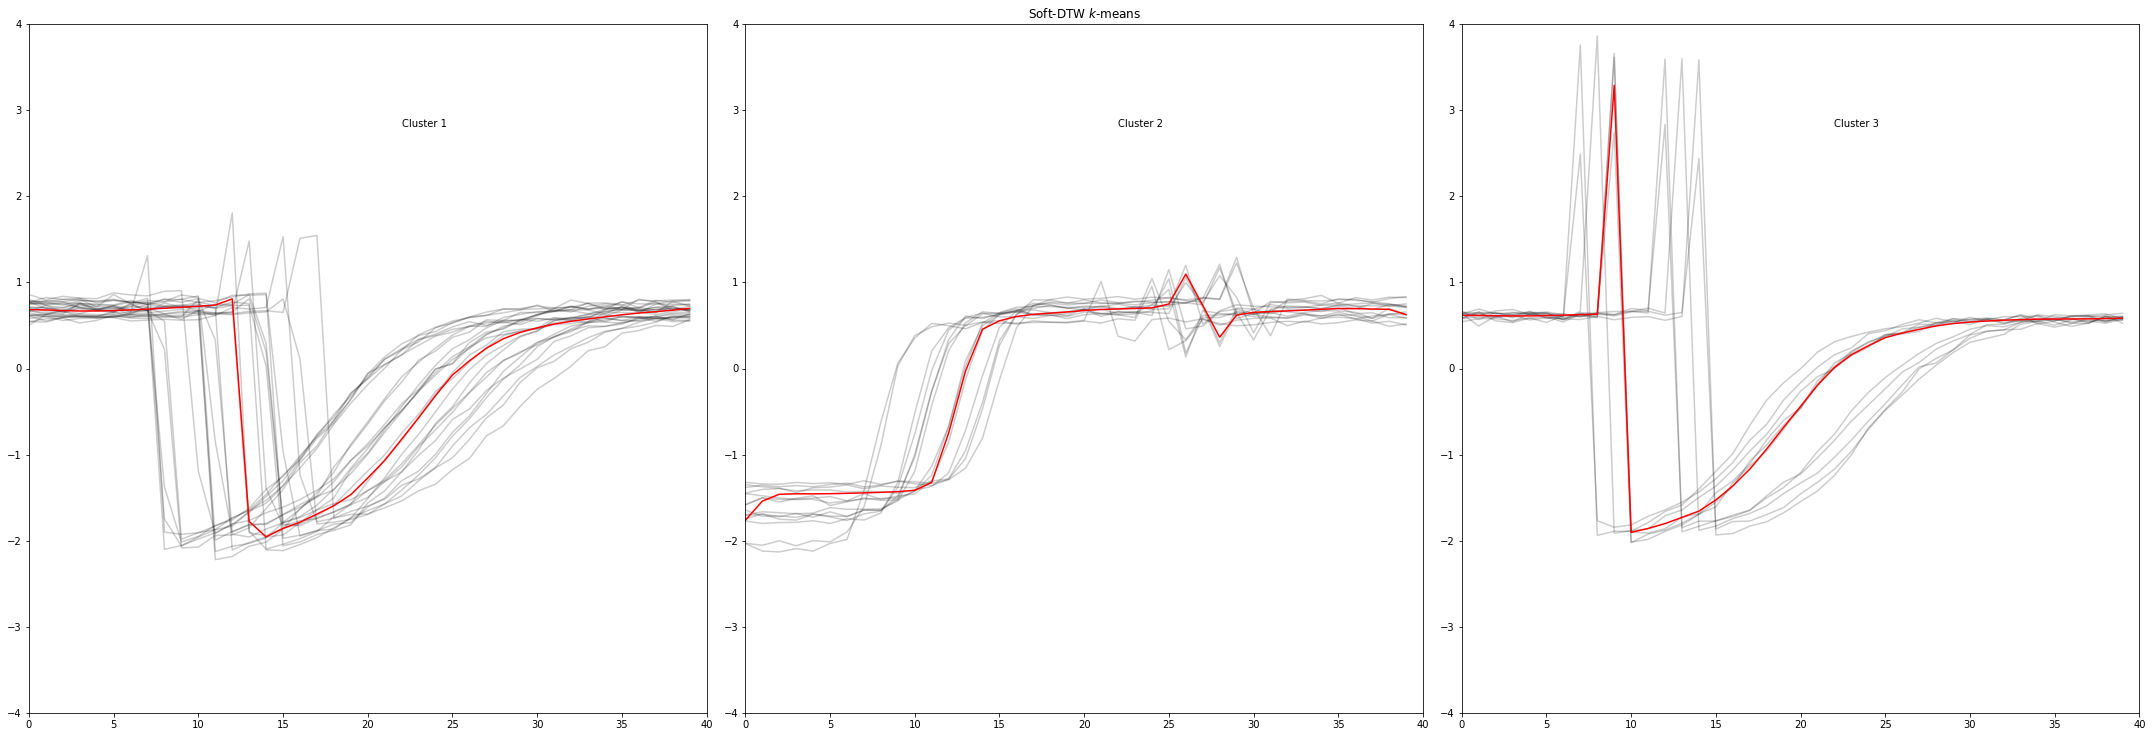

In [138]:
for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    plt.rcParams["figure.figsize"] = (30,30)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()
